<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Kwasniewska/Uczenie_nienadzorowane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer

In [135]:
df = pd.read_csv('countries of the world.csv')
df.head()
countries = df["Country"]

In [136]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [137]:
df.drop(['Country'], axis=1, inplace=True)
le = LabelEncoder()
df['Region'] = le.fit_transform(df['Region'])

In [138]:
df = df.replace(",", ".", regex=True)
columns = df.columns
for i in range(1, len(columns)):
  df[columns[i]] = df[columns[i]].apply(pd.to_numeric)

In [139]:
def fill_na_with_mean(column):
    mean = column.mean()
    return column.fillna(mean)
for i in df.columns:
    df[i] = fill_na_with_mean(df[i])


In [140]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [141]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)
kmeans.labels_

array([1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1,
       2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       2, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 0,
       1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2,
       2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1], dtype=int32)

In [142]:
new_df = pd.DataFrame()
new_df["Country"] = countries
new_df["Label"] = kmeans.labels_

In [146]:
new_df

,Country,Label
0,Afghanistan,1
1,Albania,0
2,Algeria,0
3,American Samoa,0
4,Andorra,2
...,...,...
222,West Bank,0
223,Western Sahara,0
224,Yemen,1
225,Zambia,1


In [154]:
new_df.loc[new_df["Country"] == "Poland "]["Label"]

163    0
Name: Label, dtype: int32

In [155]:
new_df.loc[new_df["Label"] == 0]

,Country,Label
1,Albania,0
2,Algeria,0
3,American Samoa,0
6,Anguilla,0
7,Antigua & Barbuda,0
...,...,...
218,Venezuela,0
219,Vietnam,0
220,Virgin Islands,0
222,West Bank,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

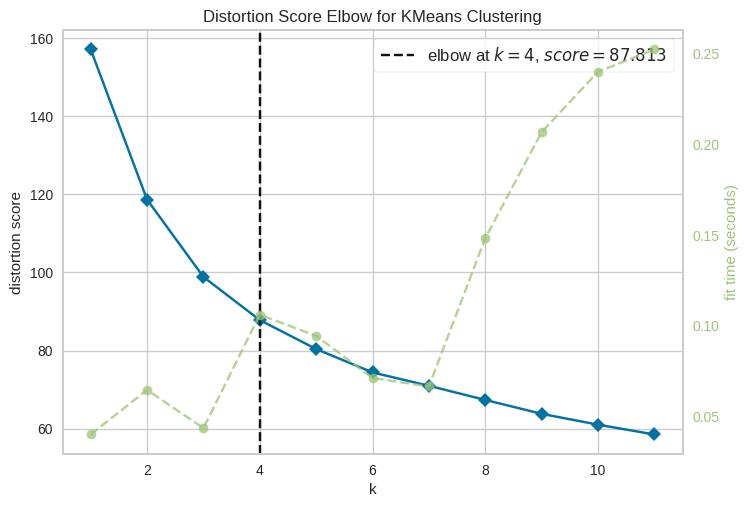

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [143]:
X = df
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X)
visualizer.show()

In [144]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import numpy as np

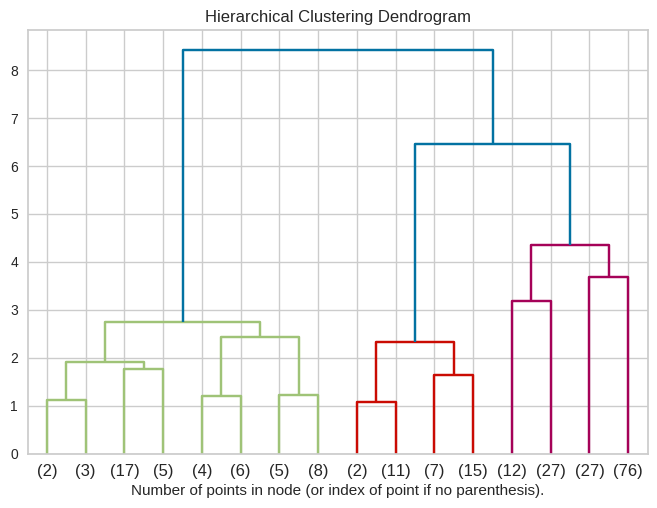

In [145]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



X = df

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()